# Linear Algebra and Monte Carlo Exercises

This notebook contains the exercises on Linear Algebra and Monte Carlo simulation. It will mainly focused on using the [numpy](https://numpy.org/doc/stable/) library.

#### Written for the QuantEcon Africa Summer Workshop (July 2023)
#### Author: [Smit Lunagariya](https://github.com/Smit-create) and [Shu Hu](https://shu-hu.com/)

In [1]:
# Import required libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig
from numpy.random import randn

### Exercise 1

Warm up on NumPy Basics.

Feel free to refer the [numpy documentation](https://numpy.org/doc/stable/reference/index.html) for API.

**Exercise 1.1**: Write a function that creates numpy array from the given list/tuple.

In [2]:
def create_array(x):
    # write your code here
    pass

In [3]:
# Solution 1.1

def create_array_solution(x):
    return np.array(x)

In [4]:
# Test your solution
assert type(create_array_solution([1, 2, 3])) == np.ndarray
assert type(create_array_solution((1, 2, 3))) == np.ndarray

**Exercise 1.2**: Write a function to return the transpose of the given matrix.

In [5]:
def get_transpose(x):
    # write your code here
    pass

In [6]:
# Solution 1.2

def get_transpose_solution(x):
    return np.transpose(x)

In [7]:
# Test your solution

assert np.allclose(get_transpose_solution(np.arange(6).reshape((3,2))), np.array([[0, 2, 4], [1, 3, 5]]))

**Exercise 1.3**: Write a function to return the inverse of the given matrix.

In [8]:
def get_inverse(x):
    # write your code here
    pass

In [9]:
# Solution 1.3

def get_inverse_solution(x):
    return np.linalg.inv(x)

In [10]:
# Test your solution

a_test = np.array([[1., 2.], [3., 4.]])
a_test_inv = get_inverse_solution(a_test)
assert np.allclose(np.dot(a_test, a_test_inv), np.eye(2))

**Exercise 1.4**: Write a function to compute the norm of the vector.

In [11]:
def get_norm(x):
    # write your code here
    pass

In [12]:
# Solution 1.4

def get_norm_solution(x):
    return np.linalg.norm(x)

In [13]:
# Test your solution

assert np.allclose(get_norm_solution([1, 2, 2, 4, 12, 5]), 13.92838827718412)

**Exercise 1.5**: Write a function that returns the standarized vector of the given vector such that the mean is $0$ and standard deviation is $1$. Mathematically:
$$
\forall x_{i}\in x:\hspace{1em}x_{i}^{\prime}=\frac{x_{i}-\mu}{\sigma}
$$

In [14]:
def standardize(x):
    # write your code here
    pass

In [15]:
# Solution 1.5

def standardize_solution(x):
    # write your code here
    mean, std = x.mean(), x.std()
    return (x - mean) / std

In [16]:
# Test your solution

a_test = np.random.randint(100, 2000, size=1000)
a_test_stdz = standardize_solution(a_test)
assert np.isclose(a_test_stdz.mean(), 0)
assert np.isclose(a_test_stdz.std(), 1)  

### Exercise 2

**Exercise 2.1**: Write a function that takes two numpy vectors as an argument and returns `True` if they are orthogonal else returns `False`.

*Note: Two vectors are called orthogonal if their inner product is zero.*

In [17]:
def is_orthogonal(x, y):
    # write your code here
    pass

In [18]:
# Solution 2.1

def is_orthogonal_solution(x, y):
    return np.allclose(x.T @ y, 0)

In [19]:
# Test your solution

assert is_orthogonal_solution(np.array([0, 1, 0, -2, 4]), np.array([-1, -4, 1, 2, 2]))
assert not is_orthogonal_solution(np.array([0, 1, 0, -2, 4]), np.array([-1, -4, 1, 2, 4]))

**Question 2.2**: Write a function to check whether the given matrix is symmetric or not.

In [20]:
def is_symmetric(x):
    # write your code here
    pass

In [21]:
# Solution 2.2

def is_symmetric_solution(x):
    if x.shape[0] != x.shape[1]:
        return False
    return np.allclose(x, x.T)

In [22]:
# Test your solution

assert is_symmetric_solution(np.eye(3))
assert is_symmetric_solution(np.array([[1, 3], [3, 1]]))
assert not is_symmetric_solution(np.array([[0, 1, 0, -2, 4], [-1, -4, 1, 2, 2]]))

### Exercise 3

**Exercise 3.1**: Given a matrix $A$, compute the eigenvalues, eigenvectors and plot them.

In [23]:
A = np.array([[1, 4], [5, 7]])

In [24]:
# Write your code here

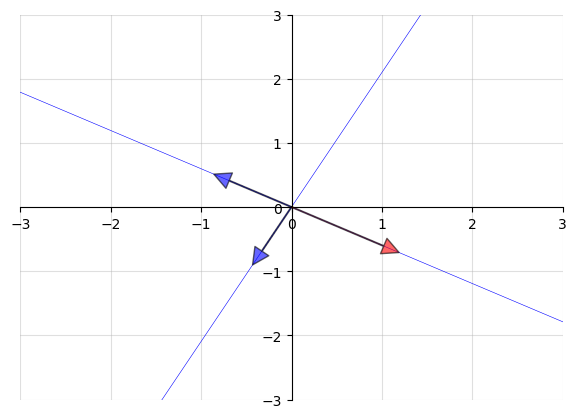

In [25]:
# Solution 3.1

A = np.array(A)
evals, evecs = eig(A)
evecs = evecs[:, 0], evecs[:, 1]

fig, ax = plt.subplots(figsize=(7, 5))

# Set the axes through the origin
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

ax.grid(alpha=0.4)

xmin, xmax = -3, 3
ymin, ymax = -3, 3
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

# Plot each eigenvector
for v in evecs:
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(facecolor='blue',
                shrink=0,
                alpha=0.6,
                width=0.5))

# Plot the image of each eigenvector
for v in evecs:
    z = A @ v
    ax.annotate('', xy=z, xytext=(0, 0),
                arrowprops=dict(facecolor='red',
                shrink=0,
                alpha=0.6,
                width=0.5))

# Plot the lines they run through
x = np.linspace(xmin, xmax, 3)
for v in evecs:
    a = v[1] / v[0]
    ax.plot(x, a * x, 'b-', lw=0.4)

plt.show()

### Exercise 4


Please refer to this [quantecon lecture](https://python.quantecon.org/time_series_with_matrices.html) before solving this exercise.

Let $ t = 0, \pm 1, \pm 2, \ldots $ index time.

For $ t = 1, 2, 3, \ldots, T $ suppose that


$$
y_{t} = \alpha_{0} + \alpha_{1} y_{t-1}
$$

where we assume that $ y_0 = 1$, $\alpha_{0}=5$, and $\alpha_{1}=1.2$.


**Exercise 4.1**: Use the matrix algebra to solve the above time series equation, and plot the solution.

*Hint:*


*Let’s write our equations as a stacked system*

$$
\underset{\equiv A}{\underbrace{\left[\begin{array}{cccccccc}
1 & 0 & 0 & 0 & \cdots & 0 & 0 & 0\\
-\alpha_{1} & 1 & 0 & 0 & \cdots & 0 & 0 & 0\\
0 & -\alpha_{1} & 1 & 0 & \cdots & 0 & 0 & 0\\
0 & 0 & -\alpha_{1} & 1 & \cdots & 0 & 0 & 0\\
\vdots & \vdots & \vdots & \vdots & \cdots & \vdots & \vdots & \vdots\\
0 & 0 & 0 & 0 & \cdots & 0 & -\alpha_{1} & 1
\end{array}\right]}}\left[\begin{array}{c}
y_{1}\\
y_{2}\\
y_{3}\\
y_{4}\\
\vdots\\
y_{T}
\end{array}\right]=\underset{\equiv b}{\underbrace{\left[\begin{array}{c}
\alpha_{0}+\alpha_{1}y_{0}\\
\alpha_{0}\\
\alpha_{0}\\
\alpha_{0}\\
\vdots\\
\alpha_{0}
\end{array}\right]}}
$$

or

$$
A y = b
$$

where

$$
y = \begin{bmatrix} y_1 \cr y_2 \cr \vdots \cr y_T \end{bmatrix}
$$

In [26]:
# Parameters

T = 20

𝛼0 = 5.0
𝛼1 = 1.2

y0 = 1.0

In [27]:
# write your code here

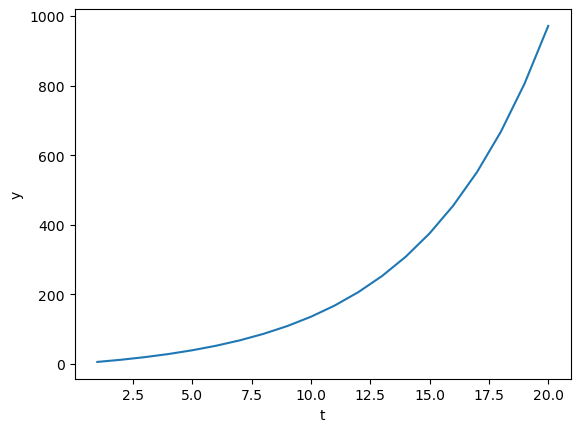

In [28]:
# Solution 4.1

A = np.identity(T)  # The T x T identity matrix

for i in range(T):
    if i-1 >= 0:
        A[i, i-1] = -𝛼1

b = np.full(T, 𝛼0)
b[0] = 𝛼0 + 𝛼1 * y0

y = np.linalg.solve(A, b)

plt.plot(np.arange(T) + 1, y)
plt.xlabel('t')
plt.ylabel('y')

plt.show()

### Exercise 5

After reading the section [An introduction to Monte Carlo](https://intro.quantecon.org/monte_carlo.html#an-introduction-to-monte-carlo) answer the following questions.

Consider a random variable $S$ in the following form

$$
S = \left ( \sum^M_{i=1} X_i \right )^p
$$

where $X_i \sim LN (\mu_i, \sigma_i)$, $M\in \mathbb N$ and $p$ is a positive number known to us.

#### Exercise 5.1

First let $M=1$ and $p=1$. Now we have

$$
    S = X_1
$$
where $X_1 \sim LN (\mu_1, \sigma_1)$.

Answer the following questions:

**Exercise 5.1.1**

Write down the analytical solutions to $\mathbb E S$ and $\mathop{\mathrm{Var}} S$.

**Solution to Exercise 5.1.1**

See section [share-price-with-known-distribution](https://intro.quantecon.org/monte_carlo.html#share-price-with-known-distribution).

**Exercise 5.1.2**

Define two python functions `mean_analytical` and `var_analytical` to compute the $\mathbb E S$ and $\mathop{\mathrm{Var}} S$ directly according to their analytical solutions.

**Solution to Exercise 5.1.2**

In [29]:
def mean_analytical(μ_1, σ_1):
    return np.exp(μ_1 + σ_1 ** 2 / 2)

In [30]:
def var_analytical(μ_1, σ_1):
    return (np.exp(σ_1 ** 2) - 1) * np.exp(2 * μ_1 + σ_1 ** 2)

**Exercise 5.1.3**

Given 

In [31]:
n = 1_000_000
p = 1
μ_1 = 0.2
σ_1 = 0.1

Approximate $\mathbb E S$ by Monte Carlo simulation in loop. 

Compare the result with the analytical solution.

Hint. 
$$
\mathbb E S \approx  
\frac{1}{n} \sum_{i=1}^n S_i    
$$

**Solution to Exercise 5.1.3**

In [32]:
S = 0.0
for i in range(n):
    X_1 = np.exp(μ_1 + σ_1 * randn())
    S += (X_1)**p
S_mean_mc = S / n
S_mean_analytical = mean_analytical(μ_1, σ_1)

In [33]:
print("Monte Carlo simulation of ES in loop is ", S_mean_mc)  
print("Analytical solution result of ES is ", S_mean_analytical)

Monte Carlo simulation of ES in loop is  1.2276003579775328
Analytical solution result of ES is  1.2275250649631777


**Exercise 5.1.4**

With the same setup

In [34]:
n = 1_000_000
p = 1
μ_1 = 0.2
σ_1 = 0.1

and given $\mathbb ES$, approximate $\mathop{\mathrm{Var}} S$ by Monte Carlo simulation.

Compare it with the analytical solution.

Hint. Note that $\mathop{\mathrm{Var}} S = \mathbb E \left [S - \mathbb E S \right ]^2$.

**Solution to Exercise 5.1.4**

We can use the result of either analytical solution or Monte Carolo simulation for $\mathbb S$.

In [35]:
S = 0.0
for i in range(n):
    X_1 = np.exp(μ_1 + σ_1 * randn())
    S += ((X_1)**p - S_mean_analytical) ** 2 
S_var_mc = S / n

In [36]:
S_var_analytical = var_analytical(μ_1, σ_1)

In [37]:
print("Monte Carlo simulation of VarS in loop is ", S_var_mc)  
print("Analytical solution result of VarS is ", S_var_analytical)

Monte Carlo simulation of VarS in loop is  0.0151376395682871
Analytical solution result of VarS is  0.015143770505780056


**Exercise 5.1.5**

With the same setup

In [38]:
n = 1_000_000
p = 1
μ_1 = 0.2
σ_1 = 0.1

Rewrite the loops in Exercises 1.1.3 and 1.1.4 with vectorization.

**Solution to Exercise 5.1.5**

First $\mathbb E S$.

In [39]:
X_1 = np.exp(μ_1 + σ_1 * randn(n))
S = (X_1)**p
S_mean_mc = S.mean()
print("Monte Carlo simulation of ES in vectorization is ", S_mean_mc)  

Monte Carlo simulation of ES in vectorization is  1.2274564158668664


Then $\mathop{\mathrm{Var}} S$.

In [40]:
X_1 = np.exp(μ_1 + σ_1 * randn(n))
S = ((X_1)**p - S_mean_analytical) ** 2
S_var_mc = S.mean()
print("Monte Carlo simulation of VarS in vectorization is ", S_var_mc) 

Monte Carlo simulation of VarS in vectorization is  0.015139794922187847


#### Exercise 5.2

Let $M=3$. Then we have

$$
    S = (X_1 + X_2 + X_3)^p
$$
which is the same form as our lecture [here](https://intro.quantecon.org/monte_carlo.html#share-price-with-unknown-distribution).

Now we don't have analytical solutions for $\mathbb E S$ and $\mathop{\mathrm{Var}} S$.

We use the following values for $ p $ and each $ \mu_i $ and $ \sigma_i $.

In [41]:
n = 1_000_000
p = 0.5
μ_1, μ_2, μ_3 = 0.2, 0.8, 0.4
σ_1, σ_2, σ_3 = 0.1, 0.05, 0.2

Here is a vectorized function that computes $\mathbb S$ using Monte carlo from the [lecture](https://intro.quantecon.org/monte_carlo.html#a-vectorized-routine).

In [42]:
def compute_mean_vectorized(n=1_000_000):
    X_1 = np.exp(μ_1 + σ_1 * randn(n))
    X_2 = np.exp(μ_2 + σ_2 * randn(n))
    X_3 = np.exp(μ_3 + σ_3 * randn(n))
    S = (X_1 + X_2 + X_3)**p
    return S.mean()

In [43]:
S_mean_mc_new = compute_mean_vectorized(n)
print("Monte Carlo simulation of ES in vectorization is ", S_mean_mc_new)  

Monte Carlo simulation of ES in vectorization is  2.2298121538347346


**Exercise 5.2.1** 

Given the monte carlo simulation of $\mathbb ES$,

approximate $\mathop{\mathrm{Var}} S$ by Monte Carlo simulation in loop.

**Solution to Exercise 5.2.1**

In [44]:
S = 0.0
for i in range(n):
    X_1 = np.exp(μ_1 + σ_1 * randn())
    X_2 = np.exp(μ_2 + σ_2 * randn())
    X_3 = np.exp(μ_3 + σ_3 * randn())
    S += ((X_1 + X_2 + X_3)**p - S_mean_mc_new) ** 2
S_var_mc_new_loop = S / n

In [45]:
print("Monte Carlo simulation of VarS in loop is ", S_var_mc_new_loop) 

Monte Carlo simulation of VarS in loop is  0.006061909368147086


**Exercise 5.2.2**

Rewrite the loop in Exercise 1.2.1 with vectorization.

In [46]:
X_1 = np.exp(μ_1 + σ_1 * randn(n))
X_2 = np.exp(μ_2 + σ_2 * randn(n))
X_3 = np.exp(μ_3 + σ_3 * randn(n))
S = ((X_1 + X_2 + X_3)**p - S_mean_mc_new) ** 2
S_var_mc_new = S.mean()

In [47]:
print("Monte Carlo simulation of VarS in vectorization is ", S_var_mc_new) 

Monte Carlo simulation of VarS in vectorization is  0.0060724495528452285
